# Background

For this project we will make use of the Airbnb data which can be accessed [here](http://insideairbnb.com/get-the-data.html). We are interested in the *listings.csv.gz* data containing all Cape Town - South Africa properties listed on the Airbnb website as of 18 July 2018 and 18 November 2018. 

# Business understanding

In this project I'll try to answer the following questions:

1. How important is location in determining the price of the accommodation
2. What types of accommodation are available
3. What are the main drivers of price
4. Do hosts increase their prices significantly between low season and high season?


#  Data Understanding

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from helper_functions import *

%matplotlib inline

/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


We'll start off by importing the csv files


In [2]:
listings = pd.read_csv('data/listings.csv',low_memory=False)
listings_july = pd.read_csv('data/listings July 2018.csv',low_memory=False)

Let's have a look at the data- especially the number of listings, the number of fields, the variable types, as well as the type of information that is available

In [3]:
nrows, ncol = listings.shape

print('Number of listings: {}'.format(nrows))
print('Number of columns: {}'.format(ncol))

Number of listings: 21765
Number of columns: 96


In [4]:
print('Variables in Dataset')
print('--------------------')
for col, col_type in zip(listings.columns,listings.dtypes):
    print(col + ': '+ str(col_type))

Variables in Dataset
--------------------
id: int64
listing_url: object
scrape_id: int64
last_scraped: object
name: object
summary: object
space: object
description: object
experiences_offered: object
neighborhood_overview: object
notes: object
transit: object
access: object
interaction: object
house_rules: object
thumbnail_url: float64
medium_url: float64
picture_url: object
xl_picture_url: float64
host_id: int64
host_url: object
host_name: object
host_since: object
host_location: object
host_about: object
host_response_time: object
host_response_rate: object
host_acceptance_rate: float64
host_is_superhost: object
host_thumbnail_url: object
host_picture_url: object
host_neighbourhood: object
host_listings_count: float64
host_total_listings_count: float64
host_verifications: object
host_has_profile_pic: object
host_identity_verified: object
street: object
neighbourhood: float64
neighbourhood_cleansed: object
neighbourhood_group_cleansed: float64
city: object
state: object
zipcode: obje

In [5]:
# Let's have a look at some of the data
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20181118040703,2018-11-18,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...",...,f,NaN,NaN,t,f,moderate,f,f,1,0.62
1,7765,https://www.airbnb.com/rooms/7765,20181118040703,2018-11-18,Garden flat in the city,Our garden flat in Tamboerskloof in the city b...,NaN,Our garden flat in Tamboerskloof in the city b...,none,NaN,...,f,NaN,NaN,f,f,flexible,f,f,1,NaN
2,13044,https://www.airbnb.com/rooms/13044,20181118040703,2018-11-18,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,0.05
3,15007,https://www.airbnb.com/rooms/15007,20181118040703,2018-11-18,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 8 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",...,f,NaN,NaN,f,f,moderate,f,f,4,0.40
4,15077,https://www.airbnb.com/rooms/15077,20181118040703,2018-11-18,Top relaxed beach living in style,Situated either on the ground floor with direc...,"A stunning architect designed guesthouse, Suns...",Situated either on the ground floor with direc...,none,It is probably the best hub in order to explor...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,0.07


Let's have a look at the summary statistics of the numeric fields

In [6]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.176500e+04,2.176500e+04,0.0,0.0,0.0,2.176500e+04,0.0,21761.000000,21761.000000,0.0,...,12892.000000,12895.000000,12886.000000,12893.000000,12883.000000,12878.000000,1.200000e+01,0.0,21765.000000,13362.000000
mean,1.720985e+07,2.018112e+13,NaN,NaN,NaN,7.134093e+07,NaN,8.369330,8.369330,NaN,...,9.634812,9.574796,9.775182,9.762352,9.657145,9.527178,4.128549e+09,NaN,7.477188,0.812242
std,7.978616e+06,0.000000e+00,NaN,NaN,NaN,6.032256e+07,NaN,27.347144,27.347144,NaN,...,0.868371,0.914849,0.738314,0.779719,0.764479,0.904631,2.484913e+08,NaN,24.589626,1.030558
min,3.191000e+03,2.018112e+13,NaN,NaN,NaN,1.687000e+03,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.010231e+09,NaN,1.000000,0.010000
25%,1.069293e+07,2.018112e+13,NaN,NaN,NaN,2.340678e+07,NaN,1.000000,1.000000,NaN,...,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,4.010231e+09,NaN,1.000000,0.130000
50%,1.744380e+07,2.018112e+13,NaN,NaN,NaN,5.077737e+07,NaN,2.000000,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.030224e+09,NaN,1.000000,0.390000
75%,2.300834e+07,2.018112e+13,NaN,NaN,NaN,1.095798e+08,NaN,4.000000,4.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.030224e+09,NaN,3.000000,1.050000
max,3.011014e+07,2.018112e+13,NaN,NaN,NaN,2.262183e+08,NaN,566.000000,566.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.660162e+09,NaN,206.000000,13.660000


From the table above, we can see that there are some variables that have missing values. Let's investigate the missing values patterns 

In [7]:
missing_values_per_field = listings.isnull().mean()

In [8]:
missing_values_per_field.sort_values(ascending=False).head(10)

xl_picture_url                  1.000000
neighbourhood                   1.000000
neighbourhood_group_cleansed    1.000000
host_acceptance_rate            1.000000
medium_url                      1.000000
jurisdiction_names              1.000000
thumbnail_url                   1.000000
license                         0.999449
square_feet                     0.996141
host_neighbourhood              0.993568
dtype: float64

In [9]:
missing_values_per_field.sort_values(ascending=False).tail(10)

room_type                         0.0
property_type                     0.0
is_location_exact                 0.0
longitude                         0.0
latitude                          0.0
calculated_host_listings_count    0.0
country_code                      0.0
smart_location                    0.0
neighbourhood_cleansed            0.0
id                                0.0
dtype: float64

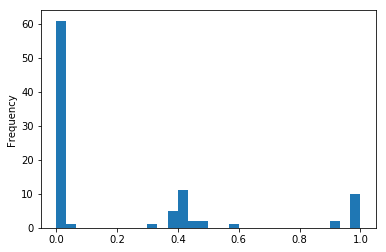

In [10]:
missing_values_per_field.plot.hist(bins=30);

From the above graph and tables, we see that there are around 10 fields where all the values are missing. Around 60 of the fields contain no missing values. In a later step we'll drop all fields where more than 80% of the values are missing

We see some very nice fields are available to explore further. We definitely want to use the price field going forward, but see it's currently a string object. Let's investigate this field further

In [11]:
listings['price'].head()

0      $657.00
1    $2,000.00
2    $1,902.00
3    $2,042.00
4    $1,357.00
Name: price, dtype: object

We see a few things that needs to be taken into account in subsequent analysis and when converting this field to numeric:

* The prices are in dollars. These looked way too high and based on my experience as a South African, it looked like it should be in South African Rands. By going onto Airbnb's website, and looking up a few of the properties, we see that this is indeed the case.
* We should strip out the $ signs and the thousand separators when converting this field to numeric values

#  Data preparation

We'll start by firstly converting the price field from character to numeric format.

In [12]:
remove_chars = dict.fromkeys(map(ord, '$,'), None)
listings['num_price'] = pd.to_numeric(listings['price'].apply(lambda x: x.translate(remove_chars)))

Next we'll have a look at the distribution of the price field

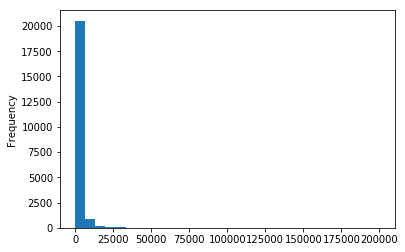

In [13]:
listings['num_price'].plot.hist(bins=30);

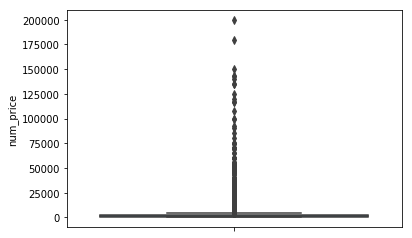

In [14]:
sns.boxplot(y='num_price',data=listings);

Wow, there are quite a few outliers is this dataset. R25 000 rand or more a night sounds a bit steep - even for properties next to the Atlantic sea board!

Let's see what the 1st and 99th percentiles in price are, as well as the mean and median values

In [15]:
pecentile_1 = listings['num_price'].quantile(q=0.01)
pecentile_99 = listings['num_price'].quantile(q=0.99)

print('1st percentile: {}'.format(pecentile_1))
print('99th percentile: {}'.format(pecentile_99))

1st percentile: 210.0
99th percentile: 20004.0


In [16]:
listings['num_price'].describe()

count     21765.000000
mean       2311.707696
std        5484.757564
min           0.000000
25%         643.000000
50%        1105.000000
75%        2154.000000
max      199997.000000
Name: num_price, dtype: float64

The minimum and maximum value can definitely not be correct. By checking some of these listings on the Airbnb's site, we see it's definitely not a data error. Our hypothesis is that the host currently doesn't want to rent out the room/property, but also don't want to remove the listing from Airbnb's website- maybe arduous to list it again or maybe there are some cost considerations involved- so they set it to an exorbitant amount so no-one will book this property. So the question is, what cut-off values should be used for a entry to be classified as an outlier? There are multiple ways to identify outliers in the literature, from using the interquartile (the distance between the 1st and 3rd quartile) range (Tukey's method) to more advanced techniques. Let's calculate the cut-offs using Tukey's method.

In [17]:
pecentile_25 = listings['num_price'].quantile(q=0.25)
pecentile_75 = listings['num_price'].quantile(q=0.75)
IQR = pecentile_75 - pecentile_25

In [18]:
print('Lower cut-off: {}'.format(pecentile_25 - 1.5*IQR))
print('Upper cut-off: {}'.format(pecentile_75 + 1.5*IQR))

Lower cut-off: -1623.5
Upper cut-off: 4420.5


This may be too aggressive- especially for the high end properties that caters for the foreign tourists. By making use of the 1st and 99th percentile, we remove all listings where the price is below or above these cut-off values respectively

In [19]:
outliers_removed = (listings[(listings['num_price'] >= pecentile_1)
                             & (listings['num_price'] <= pecentile_99)].copy())
                                                  

In [20]:
nrows2, ncol2 = outliers_removed.shape
print('Number of rows removed: {}'.format(nrows-nrows2))

Number of rows removed: 404


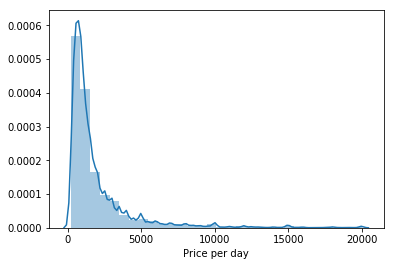

In [21]:
#Plot the distribution after outlier were removed
sns.distplot(outliers_removed['num_price'],bins=30,axlabel='Price per day');
plt.savefig('graphs/Prince per day Histogram.png')

Fields were more than 80% of the values are missing won't be of much use to analyse further. So we'll drop them all together

In [22]:
drop_vars = missing_values_per_field[missing_values_per_field > 0.8].index

In [23]:
drop_vars

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed',
       'square_feet', 'weekly_price', 'monthly_price', 'license',
       'jurisdiction_names'],
      dtype='object')

In [24]:
outliers_removed.drop(drop_vars,axis=1,inplace=True)

Next, let's investigate the amenities field

In [25]:
outliers_removed['amenities'].head()

0    {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
1    {TV,"Cable TV",Wifi,Kitchen,"Hot tub","Buzzer/...
2    {TV,Wifi,"Air conditioning",Breakfast,"Free st...
3    {TV,"Cable TV",Internet,Wifi,"Wheelchair acces...
4    {Internet,Wifi,"Wheelchair accessible",Pool,Ki...
Name: amenities, dtype: object

In [26]:
outliers_removed['amenities'][0]

'{TV,"Cable TV",Wifi,"Air conditioning",Kitchen,"Free parking on premises","Pets live on this property",Cat(s),"Other pet(s)","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private entrance","Hot water",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Single level home","BBQ grill","Patio or balcony","Garden or backyard","Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout","Well-lit path to entrance","Host greets you"}'

Next we'll create some indicator variables to indicate the presence or not of each of these amenities. 

In [27]:
word_index_map = {}
amenities_tokenize = []
current_index = 0

for amenity in outliers_removed['amenities']:
    
    tokens = my_tokenizer(amenity)
    amenities_tokenize.append(tokens)
    
    for token in tokens:
        
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1

In [28]:
data = np.zeros((nrows2,len(word_index_map)))
i = 0

for token in amenities_tokenize:
    xy = tokens_to_vector(token,word_index_map)
    data[i,:] = xy
    i += 1

In [29]:
amenities_df = pd.DataFrame(data,columns=pd.Series(word_index_map).sort_values().index,index=outliers_removed.index)

In [30]:
amenities_df.head()

,TV,Cable TV,Wifi,Air conditioning,Kitchen,Free parking on premises,Pets live on this property,Cat(s),Other pet(s),Buzzer/wireless intercom,...,Mudroom,High-resolution computer monitor,Brick oven,Ground floor access,Air purifier,Private gym,Electric profiling bed,Pool with pool hoist,Mobile hoist,Ceiling hoist
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
amenities_df.max()

TV                                  1.0
Cable TV                            1.0
Wifi                                1.0
Air conditioning                    1.0
Kitchen                             1.0
Free parking on premises            1.0
Pets live on this property          1.0
Cat(s)                              1.0
Other pet(s)                        1.0
Buzzer/wireless intercom            1.0
Heating                             1.0
Washer                              1.0
Dryer                               1.0
Smoke detector                      1.0
Carbon monoxide detector            1.0
First aid kit                       1.0
Essentials                          1.0
Shampoo                             1.0
24-hour check-in                    1.0
Hangers                             1.0
Hair dryer                          1.0
Iron                                1.0
Laptop friendly workspace           1.0
Private entrance                    1.0
Hot water                           1.0


Let's drop all amenities indicators where there are fewer than 50 instances.

In [32]:
drop_columns = [] 


for col in amenities_df.columns: 
    number_amenities = amenities_df[col].sum()

    if number_amenities < 50:
        drop_columns.append(col)
        
amenities_df.drop(labels=drop_columns,axis=1,inplace=True)

Now we can join the amenities dataframe to our listing dataframe

In [33]:
combined_df = outliers_removed.join(amenities_df)

In [34]:
combined_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Lake access,Day bed,Ceiling fan,Formal dining area,Fixed grab bars for shower,DVD player,Heated floors,Mini fridge,EV charger,Baby monitor
0,3191,https://www.airbnb.com/rooms/3191,20181118040703,2018-11-18,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7765,https://www.airbnb.com/rooms/7765,20181118040703,2018-11-18,Garden flat in the city,Our garden flat in Tamboerskloof in the city b...,NaN,Our garden flat in Tamboerskloof in the city b...,none,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13044,https://www.airbnb.com/rooms/13044,20181118040703,2018-11-18,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15007,https://www.airbnb.com/rooms/15007,20181118040703,2018-11-18,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 8 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15077,https://www.airbnb.com/rooms/15077,20181118040703,2018-11-18,Top relaxed beach living in style,Situated either on the ground floor with direc...,"A stunning architect designed guesthouse, Suns...",Situated either on the ground floor with direc...,none,It is probably the best hub in order to explor...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next we can convert the `host since` field to a date time and calculate the number of months this person has been a Airbnb host

In [35]:
combined_df['host_since'] = pd.to_datetime(combined_df['host_since']) 
combined_df['calendar_last_scraped'] = pd.to_datetime(combined_df['calendar_last_scraped']) 

In [36]:
combined_df['months_host'] = combined_df['host_since'].apply(diff_month)

In [37]:
combined_df['months_host'].describe()

count    21357.000000
mean        36.629442
std         20.337040
min          0.000000
25%         23.000000
50%         35.000000
75%         48.000000
max        123.000000
Name: months_host, dtype: float64

# Business Questions

## How important is location in determining the price of the accommodation

Next we are interested in whether the price per night is correlated to the proximity to the sea. This can be answered either by looking at it visually (points on a map) or calculating the distance of the property to the shore line (possible since the coordinates of the property are included, but more computationally intensive). We make use of [Open Street map](https://www.openstreetmap.org/#map=12/-33.9258/18.4230) to plot the data and the [following](https://stackoverflow.com/questions/28476117/easy-openstreetmap-tile-displaying-for-python#28530369) solution was used as starting block for our analysis.

Opening: http://a.tile.openstreetmap.org/13/4514/4915.png
Opening: http://a.tile.openstreetmap.org/13/4514/4916.png
Opening: http://a.tile.openstreetmap.org/13/4514/4917.png
Opening: http://a.tile.openstreetmap.org/13/4514/4918.png
Opening: http://a.tile.openstreetmap.org/13/4514/4919.png
Opening: http://a.tile.openstreetmap.org/13/4515/4915.png
Opening: http://a.tile.openstreetmap.org/13/4515/4916.png
Opening: http://a.tile.openstreetmap.org/13/4515/4917.png
Opening: http://a.tile.openstreetmap.org/13/4515/4918.png
Opening: http://a.tile.openstreetmap.org/13/4515/4919.png
Opening: http://a.tile.openstreetmap.org/13/4516/4915.png
Opening: http://a.tile.openstreetmap.org/13/4516/4916.png
Opening: http://a.tile.openstreetmap.org/13/4516/4917.png
Opening: http://a.tile.openstreetmap.org/13/4516/4918.png
Opening: http://a.tile.openstreetmap.org/13/4516/4919.png
Opening: http://a.tile.openstreetmap.org/13/4517/4915.png
Opening: http://a.tile.openstreetmap.org/13/4517/4916.png
Opening: http:

/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3363: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3372: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3289: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3298: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


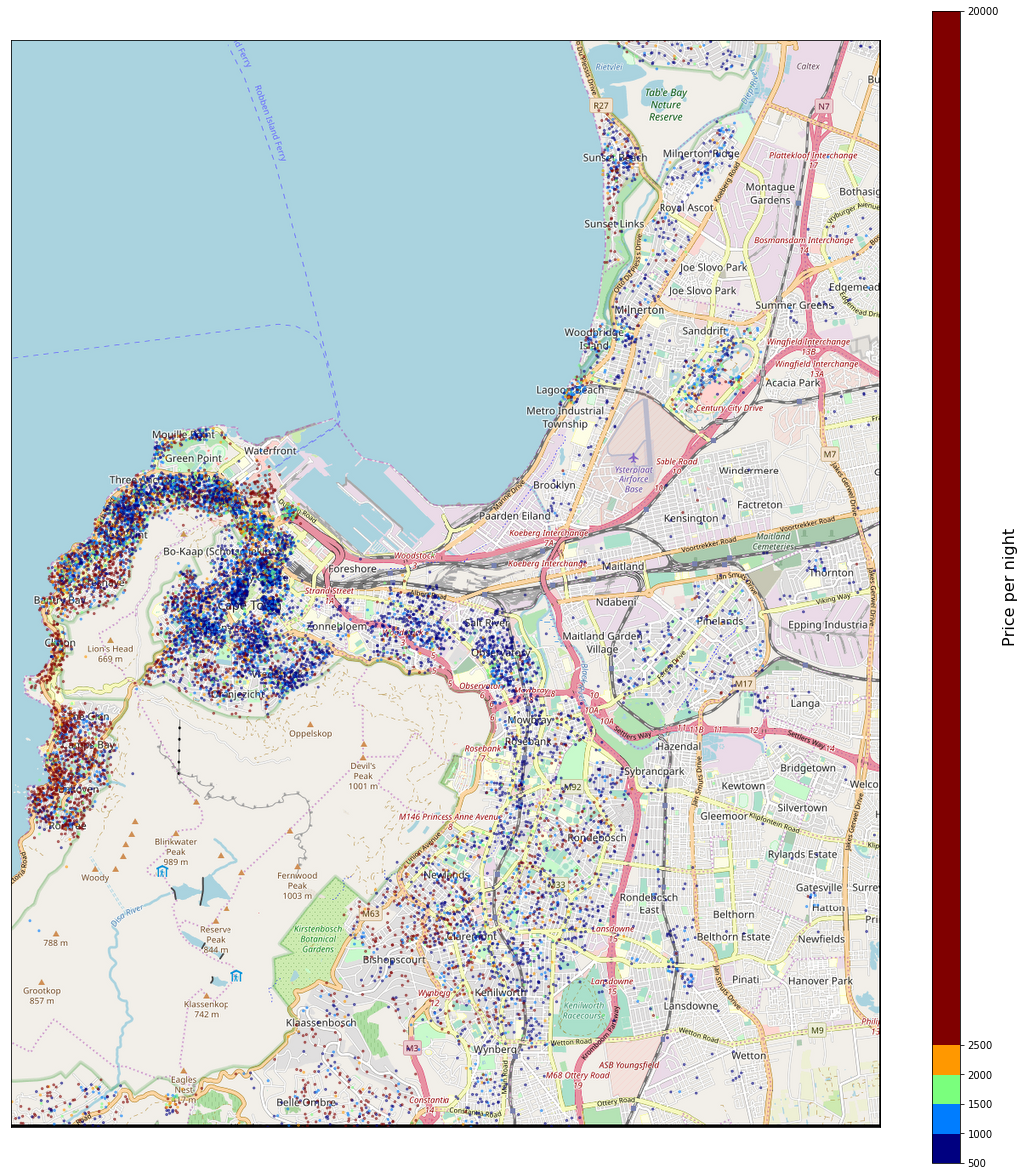

In [38]:
lat_deg = -34.000
long_deg = 18.372741
delta_lat= 0.15
delta_long =  0.14
zoom = 13

if __name__ == '__main__':

    a, bbox = getImageCluster(lat_deg, long_deg, delta_lat,  delta_long, zoom)

    fig = plt.figure(figsize=(20, 20))
    ax = plt.subplot(111)
 
    cmap = plt.cm.get_cmap(name='jet')    
    m = Basemap(
        llcrnrlon=bbox[0], llcrnrlat=bbox[1],
        urcrnrlon=bbox[2], urcrnrlat=bbox[3],
        projection='merc', ax=ax
    )
    # list of points to display (long, lat)
    ls_points = [m(x,y) for x,y in zip(combined_df['longitude'],combined_df['latitude'])]
    m.imshow(a, interpolation='lanczos', origin='upper')
    
    
    bounds = [500, 1000, 1500, 2000, 2500, 20000]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
  

    m.scatter(x=[point[0] for point in ls_points],
               y= [point[1] for point in ls_points],
               alpha = 0.5,s=4,c=outliers_removed['num_price'],cmap=cmap,norm=norm)
    

    ax1 = fig.add_axes([0.85, 0.10, 0.02, 0.8])

    cb2 = mpl.colorbar.ColorbarBase(ax1,cmap=cmap,
                                norm=norm,
                                orientation='vertical',
                                ticks=bounds,  
                                spacing='proportional')
    
    
    cb2.set_label('Price per night', fontsize=16)

    

    plt.savefig('graphs/Cape Town map.png',dpi=200,bbox_inches = 'tight',pad_inches = 0)

From the above map, it isn't that clear cut that the closer the property is to the coast line, the higher the price per night. What might be more predictive, is certain 'affluent' suburbs , like Clifton, Camps Bay, Bishopscourt and Llandudno. These suburbs are known as some of the wealthiest in Cape Town (https://businesstech.co.za/news/property/243559/the-most-expensive-streets-suburbs-and-estates-in-cape-town/). We can indeed check this. The cleanest field that can be used for this purpose, is the neighbourhood_cleansed field. This is rolled up to a ward level. We can always create a lookup table to see which neighbourhoods fall in which wards.

In [39]:
ave_price_suburb = (combined_df
                    .groupby('neighbourhood_cleansed')['num_price']
                    .agg(['mean','count']))

ave_price_suburb.sort_values(by='mean',ascending=False)

,mean,count
neighbourhood_cleansed,,
Ward 40,4001.000000,1
Ward 54,3833.566534,2773
Ward 62,3548.628205,702
Ward 104,3056.500000,2
Ward 74,2840.928023,1042
Ward 71,2781.483376,391
Ward 69,2367.019120,523
Ward 110,2299.000000,3
Ward 46,2110.105263,19


We are only interested in wards where these are more than 10 listings

In [40]:
ave_price_suburb.query('count > 10').sort_values(by='mean',ascending=False)

,mean,count
neighbourhood_cleansed,,
Ward 54,3833.566534,2773
Ward 62,3548.628205,702
Ward 74,2840.928023,1042
Ward 71,2781.483376,391
Ward 69,2367.019120,523
Ward 46,2110.105263,19
Ward 14,2004.882353,34
Ward 59,1919.047686,713
Ward 4,1836.848765,324


We see the average price per night ranges from R564 in Ward 7 and R3833 in Ward 54.Let's see which neighbourhoods these comprise

In [41]:
wards_of_interest =(combined_df.loc[outliers_removed["neighbourhood_cleansed"]
                     .isin(['Ward 7','Ward 54']),:])


In [42]:
pd.pivot_table(index='smart_location',columns='neighbourhood_cleansed',
               data=wards_of_interest,values='id',aggfunc='count')

neighbourhood_cleansed,Ward 54,Ward 7
smart_location,,
"., South Africa",4.0,NaN
"Bakoven, South Africa",3.0,NaN
"Bantry Bay, Cape Town, South Africa",2.0,NaN
"Bantry Bay, South Africa",7.0,NaN
"CAPE TOWN, South Africa",1.0,NaN
"Camps Bay , South Africa",3.0,NaN
"Camps Bay .Cape Town, South Africa",1.0,NaN
"Camps Bay Cape Town, South Africa",1.0,NaN
"Camps Bay, Cape Town , South Africa",1.0,NaN


To get the suburb, we can can write the following lambda function

In [43]:
get_suburb = lambda textstring: textstring.title().split(',')[0].strip()

combined_df['suburb'] = outliers_removed['smart_location'].apply(get_suburb)

In [44]:
wards_of_interest =(combined_df.loc[outliers_removed["neighbourhood_cleansed"]
                     .isin(['Ward 63','Ward 54']),:])

pd.pivot_table(index='suburb',columns='neighbourhood_cleansed',
               data=wards_of_interest,values='id',aggfunc='count')

neighbourhood_cleansed,Ward 54,Ward 63
suburb,,
.,4.0,NaN
Bakoven,3.0,NaN
Bantry Bay,9.0,NaN
Camps Bay,58.0,NaN
Camps Bay .Cape Town,1.0,NaN
Camps Bay Cape Town,1.0,NaN
Cape Town,2630.0,56.0
Cape Town / Sea Point,1.0,NaN
Cape Town Camps Bay,1.0,NaN


From the above table we see that these Ward 54 indeed contain some of these affluent suburbs

## What types of accommodation are available

Next we can investigate what type of accommodation is available

In [45]:
property_type_prop = combined_df['property_type'].value_counts()/nrows2
property_type_prop

Apartment             0.368756
House                 0.323580
Guest suite           0.056739
Guesthouse            0.036094
Villa                 0.034736
Bed and breakfast     0.034362
Serviced apartment    0.032864
Condominium           0.026169
Townhouse             0.025701
Loft                  0.014700
Cottage               0.013014
Other                 0.007490
Bungalow              0.006741
Boutique hotel        0.004073
Hostel                0.003371
Chalet                0.002856
Farm stay             0.002294
Cabin                 0.002107
Aparthotel            0.000983
Hotel                 0.000936
Tiny house            0.000421
Resort                0.000375
Earth house           0.000328
Nature lodge          0.000281
Boat                  0.000234
Hut                   0.000234
Vacation home         0.000094
Island                0.000094
Lighthouse            0.000094
Dome house            0.000047
Castle                0.000047
Cave                  0.000047
Camper/R

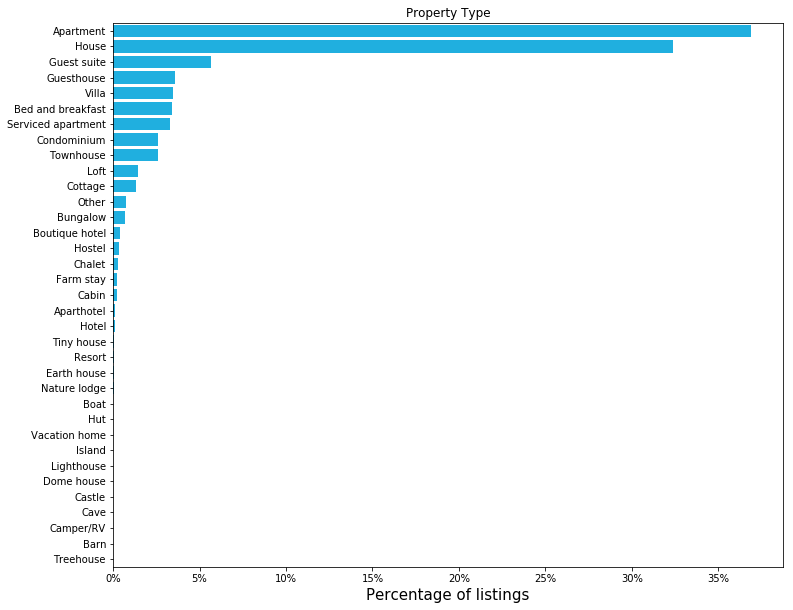

In [49]:
draw_up_bar_chart(property_type_prop,'Property Type')

We see the majority of properties offered are either Apartments or Houses, followed by guest suites trailing at around 6%. Next we are interested in whether the whole apartment is available or only a room.

In [47]:
room_type_prop = combined_df['room_type'].value_counts()/nrows2
room_type_prop

Entire home/apt    0.765320
Private room       0.228875
Shared room        0.005805
Name: room_type, dtype: float64

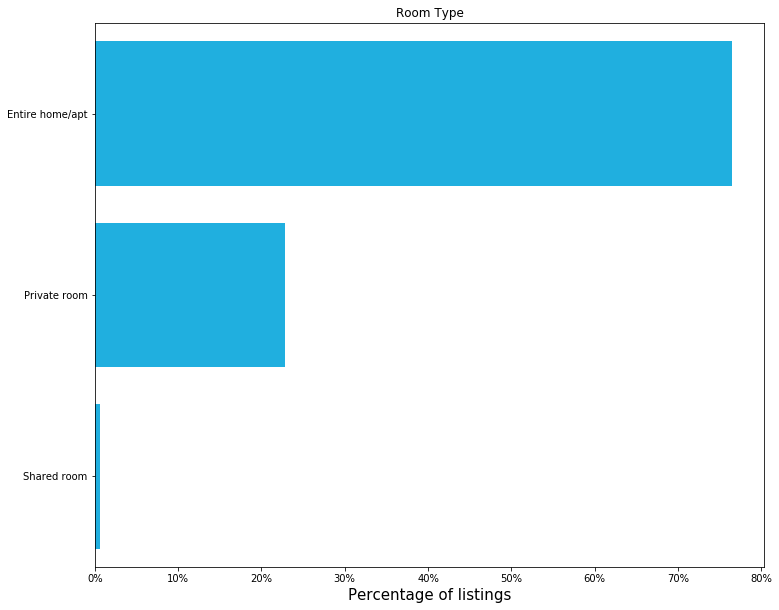

In [48]:
draw_up_bar_chart(room_type_prop,'Room Type')

We see that in the vast majority of cases (76.5%) the whole apartment/home is available for the guest. Lastly we can see what amenities are available at the accommodation

In [50]:
word_index_map = {}
amenities_tokenize = []

for amenity in combined_df['amenities']:
    
    tokens = my_tokenizer(amenity)
    amenities_tokenize.append(tokens)
    
    for token in tokens:
        
        if token not in word_index_map:
            word_index_map[token] = 1
        else:
            word_index_map[token] += 1

In [51]:
anemities_prop = pd.Series(word_index_map) / nrows2

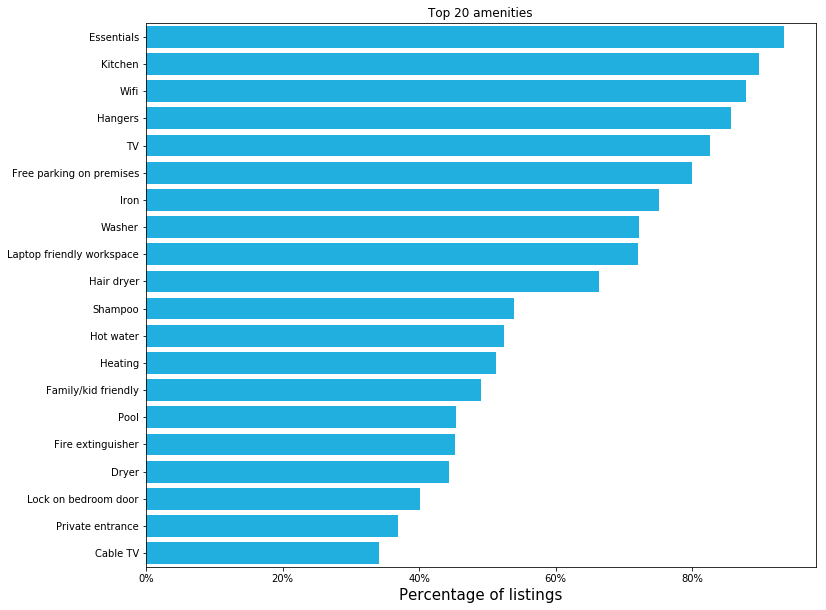

In [52]:
draw_up_bar_chart(anemities_prop.sort_values(ascending=False)[:20],label='Top 20 amenities') 


We see that more than 80% of the properties have a kitchen (self-catering) and Wifi. Around 60% also have hot water! 

## What are the main drivers of price

In this section we are interested to see which features are most predictive of price. We need to do a few additional data manipulations before we can start modeling. We first have to replace the `host is superhost` field with 1s and 0s

In [55]:
combined_df['host_is_superhost'] = combined_df['host_is_superhost'].apply(lambda x:1 if x== 't' else 0)
combined_df['host_is_superhost'] .value_counts()

0    17689
1     3672
Name: host_is_superhost, dtype: int64

Next we can group the smaller property type categories into a separate other category

In [56]:
combined_df['property_type_grouped'] =combined_df['property_type'].apply(property_type_grouped)
combined_df['property_type_grouped'].value_counts()

Apartment             7877
House                 6912
Other                 1303
Guest suite           1212
Guesthouse             771
Villa                  742
Bed and breakfast      734
Serviced apartment     702
Condominium            559
Townhouse              549
Name: property_type_grouped, dtype: int64

We can also create a new field that indicates the vacancy rate of the property for the next 30 days

In [57]:
combined_df['vacancy_rate_next30'] = combined_df['availability_30']/30*100

Next we'll dummy encode the following categorical variables:

* neighbourhood_cleansed
* property_type_grouped
* room_type

In [58]:
combined_df = pd.get_dummies(combined_df,columns=['neighbourhood_cleansed','property_type_grouped','room_type'],dummy_na=True)

In [59]:
combined_df.shape

(21361, 333)

Lastly we can impute or drop listings that contain missing values

In [60]:
neighbourhood_vars = [col for col in combined_df.columns if col.startswith('neighbourhood_cleansed')]
property_type_vars = [col for col in combined_df.columns if col.startswith('property_type_grouped')]
room_type_vars = [col for col in combined_df.columns if col.startswith('room_type')]

features = (['months_host','host_is_superhost', 'review_scores_rating',
'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_value',
             'vacancy_rate_next30'] 
            + list(amenities_df.columns)
            + neighbourhood_vars
            + property_type_vars
            + room_type_vars)


In [61]:
perc_missings = combined_df[features].isnull().mean()
perc_missings.sort_values(ascending=False)

review_scores_value                0.404007
review_scores_location             0.403820
review_scores_checkin              0.403680
review_scores_accuracy             0.403399
review_scores_communication        0.403352
review_scores_cleanliness          0.403258
review_scores_rating               0.402556
months_host                        0.000187
Lockbox                            0.000000
High chair                         0.000000
Window guards                      0.000000
Crib                               0.000000
Pocket wifi                        0.000000
Wide doorway                       0.000000
Beach essentials                   0.000000
Doorman                            0.000000
Gym                                0.000000
Elevator                           0.000000
Dog(s)                             0.000000
Other                              0.000000
Smoking allowed                    0.000000
Changing table                     0.000000
Pool                            

We see that only the `review scores` and  `months host` field contains missing values. We'll replace missing ratings with 0s and create an flag to indicate whether the rating was missing or not. We'll drop all listing where the `months host` field is missing.

In [63]:
impute_vars = ['review_scores_rating',
'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_value']

for var in impute_vars:
    imp_varname = var + '_imp'
    combined_df[imp_varname] = combined_df[var].isnull()
    combined_df[var] = combined_df[var].fillna(value=0)
    features.append(imp_varname)

In [64]:
combined_df.dropna(axis=0,how='any', subset=['months_host'], inplace=True)

To test which features are most predictive of price, I made use of a Lasso regression model initially. Least Absolute Shrinkage and Selection Operator Regression is a regularized version of Linear Regression where a regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but to keep the weights as small as possible. An import characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e. set them to zero)

In [65]:
y = combined_df['num_price']
X = combined_df[features]

X.columns = [column.replace(" ","_") for column in X.columns]

In [66]:
# Initialize the model and set normalize = True. 
# This will scale the variables. We'll also make use of the default alpha value
lasso_model = Lasso(normalize=True,alpha=1)

lasso_model.fit(X,y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [67]:
output = lasso_summary_table(lasso_model,features)

output

,Variable,Coefficient
251,property_type_grouped_Villa,2961.899479
201,neighbourhood_cleansed_Ward 54,1392.008219
253,room_type_Entire home/apt,774.532340
80,Indoor fireplace,631.121279
247,property_type_grouped_House,587.479790
13,Air conditioning,564.385143
78,Pool,505.076371
22,Dryer,448.805086
210,neighbourhood_cleansed_Ward 62,283.163936
71,Dishwasher,10.112748


In [68]:
output.shape

(13, 2)

We see that only 14 of the features came out as predictive- with Villa Property type contributing the most to price, followed by properties located in Ward 54. Next we make use of a Random forest to see whether the same features come out as most predictive

In [69]:
rf = RandomForestRegressor(n_estimators=100)

rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

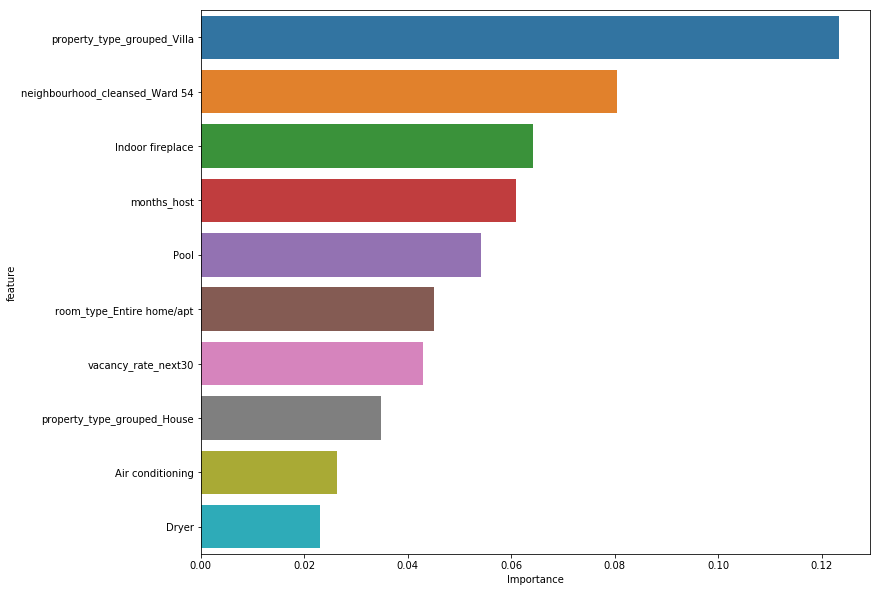

In [70]:
feature_importance_graph(rf,features,'Feature importance graph - price')

We see that there are overlaps between the Lasso results and the random forest results - with both Villa and Ward 54 coming out tops. Instead of modelling price, we'll model price per person, since we expect that the price will be higher if it can accommodate more people - which is curious since it didn't feature in the Lasso or Random forest model.

In [71]:
y2 = combined_df['num_price']/combined_df['accommodates']

rf_2 = RandomForestRegressor(n_estimators=100)

rf_2.fit(X,y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

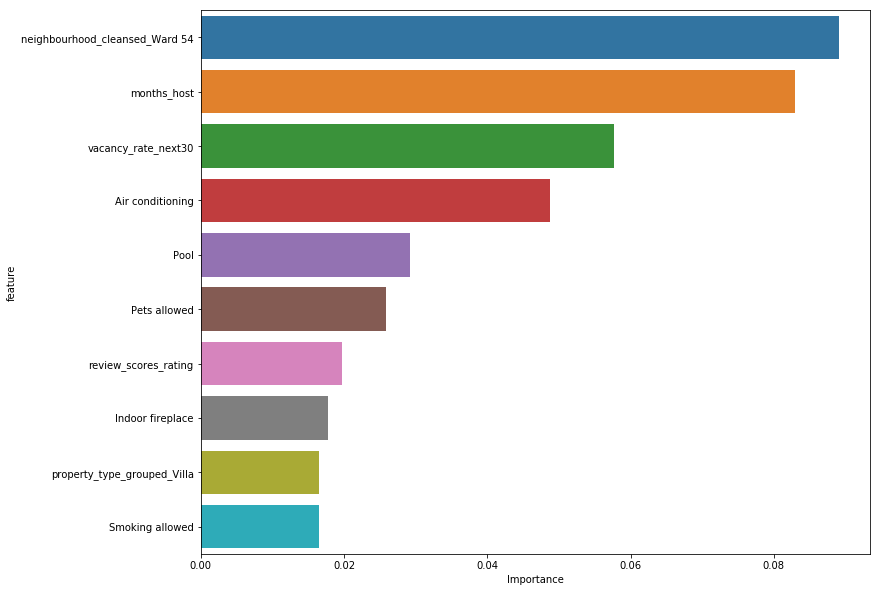

In [72]:
feature_importance_graph(rf_2,features,'Feature importance graph - price per person')

combined_df['price_per_person'] = combined_df['num_price']/combined_df['accommodates']

We can see what the nature of the relationship is by making use of Lasso regression again. We I tried to fit it using  $\alpha$ = 1, it didn't return any features, so I tried $\alpha$ = 0.5 

In [73]:
lasso_model = Lasso(normalize=True,alpha=0.5)

lasso_model.fit(X,y2)

output = lasso_summary_table(lasso_model,features)

output


,Variable,Coefficient
201,neighbourhood_cleansed_Ward 54,158.029382
13,Air conditioning,70.605539
78,Pool,2.117099
8,review_scores_value,-0.693317


Now we see only 4 variables coming out as predictive, with listings situated in Ward 54 coming out tops. followed by whether the property has air conditioning. 

## Do hosts increase their prices significantly between low season and high season?

Lastly for the exploratory analysis part, it will be interesting to see whether hosts increase their prices between peak season and out of season periods

In [74]:
# Convert price variable to numeric
listings_july['num_price_july'] = pd.to_numeric(listings_july['price'].apply(lambda x: x.translate(remove_chars)))

In [76]:
# Join November and July listings table
nov_july_prices = (pd.merge(outliers_removed[['id','num_price']],
                            listings_july[['id','num_price_july']]
                            ,how='inner',on='id'))


In [77]:
nov_july_prices.shape

(17315, 3)

In [79]:
# Calculate price differences
nov_july_prices['Price_difference'] = (nov_july_prices['num_price'] 
                                       - nov_july_prices['num_price_july'])

In [80]:
nov_july_prices.head()

,id,num_price,num_price_july,Price_difference
0,3191,657.0,625.0,32.0
1,7765,2000.0,1995.0,5.0
2,13044,1902.0,2021.0,-119.0
3,15007,2042.0,2048.0,-6.0
4,15077,1357.0,1316.0,41.0


In [81]:
nov_july_prices.describe()

,id,num_price,num_price_july,Price_difference
count,1.731500e+04,17315.000000,17315.000000,17315.000000
mean,1.504070e+07,1941.821658,1937.478776,4.342882
std,6.823494e+06,2463.685227,2503.555359,586.011486
min,3.191000e+03,210.000000,0.000000,-40496.000000
25%,9.600042e+06,643.000000,652.000000,-4.000000
50%,1.589393e+07,1105.000000,1077.000000,1.000000
75%,2.126327e+07,2000.000000,1995.000000,7.000000
max,2.689138e+07,20004.000000,45000.000000,19086.000000


From the above table we see that the vast majority of hosts didn't increase their prices- more specifically 50% of hosts changed their prices between R4 and R7! We can also split the price changes into 10 deciles to get a clearer picture.

In [82]:
nov_july_prices['Price_difference'].quantile(q=np.linspace(0, 1, num=11))

0.0   -40496.0
0.1       -9.0
0.2       -6.0
0.3       -4.0
0.4       -1.0
0.5        1.0
0.6        4.0
0.7        5.0
0.8        9.0
0.9       57.0
1.0    19086.0
Name: Price_difference, dtype: float64

Again, we see only 10% of this listings had an increase of R57 or more between July and December

Let's plot these differences

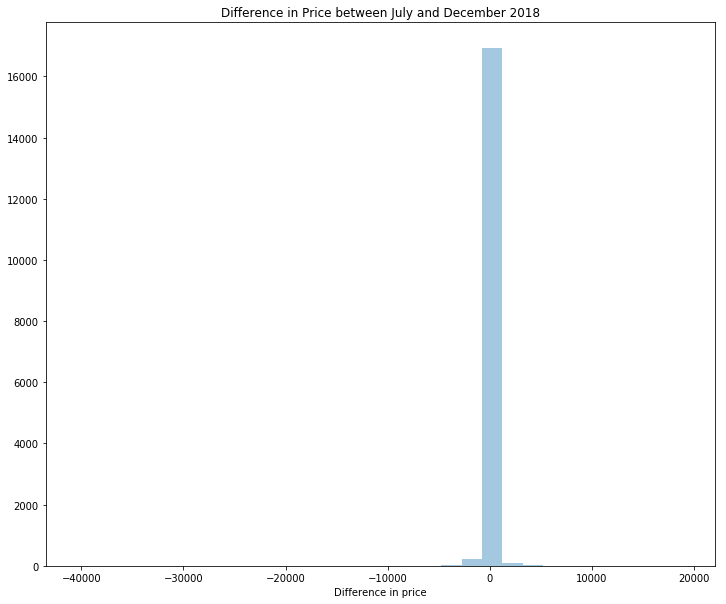

In [83]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.distplot(nov_july_prices['Price_difference'],bins=30,kde=False,axlabel='Difference in price');
plt.title('Difference in Price between July and December 2018');
plt.savefig('graphs/Price differences.png')

# Results evaluation

From the above analysis we see that there is definitely an element of location in driving the price of an Airbnb accommodation- but it's mostly restricted to high end properties close to the Atlantic sea board. What is more, there is little evidence to support he hypothesis that host significantly increase their listing price between the low and high seasons. It is of course mostly driven by supply and demand, so taking this factor into account the picture might look totally different